<a href="https://colab.research.google.com/github/ArielIvan1981/DataScience/blob/main/Data%20Analytics/DataManipulationPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Creacion de Dataset

In [2]:
datos = pd.DataFrame(data={"Pais":['Mexico','Argentina','Espana','Colombia'],
                        "Poblacion":[127212000, 45167000, 47099000, 48922000]})

In [3]:
datos

,Pais,Poblacion
0,Mexico,127212000
1,Argentina,45167000
2,Espana,47099000
3,Colombia,48922000


## Ordenamos por columna

In [4]:
datos.sort_values(["Poblacion"], ascending=False)

,Pais,Poblacion
0,Mexico,127212000
3,Colombia,48922000
2,Espana,47099000
1,Argentina,45167000


In [5]:
datos = datos.sort_values(["Pais"])
datos

,Pais,Poblacion
1,Argentina,45167000
3,Colombia,48922000
2,Espana,47099000
0,Mexico,127212000


## Agregar una columna

In [6]:
datos["Superficie"] = [1964375, 2780400, 505944, 1142748]
datos

,Pais,Poblacion,Superficie
1,Argentina,45167000,1964375
3,Colombia,48922000,2780400
2,Espana,47099000,505944
0,Mexico,127212000,1142748


### Asignar un mismo valor a todas las filas de una columna

In [7]:
datos['Deporte']= 'Futbol'
datos

,Pais,Poblacion,Superficie,Deporte
1,Argentina,45167000,1964375,Futbol
3,Colombia,48922000,2780400,Futbol
2,Espana,47099000,505944,Futbol
0,Mexico,127212000,1142748,Futbol


## Eliminar una colummna

In [8]:
datos = datos.drop(['Deporte'],axis=1)
datos

,Pais,Poblacion,Superficie
1,Argentina,45167000,1964375
3,Colombia,48922000,2780400
2,Espana,47099000,505944
0,Mexico,127212000,1142748


## Eliminar multiples columnas

In [9]:
datos.drop(['Superficie','Pais'], axis=1)

,Poblacion
1,45167000
3,48922000
2,47099000
0,127212000


In [10]:
datos # Como no lo asignamos, el df anterior sigue "intacto"

,Pais,Poblacion,Superficie
1,Argentina,45167000,1964375
3,Colombia,48922000,2780400
2,Espana,47099000,505944
0,Mexico,127212000,1142748


## Agregar una fila nueva

In [11]:
cantidad_filas = len(datos) # obtengo la cantidad de filas
cantidad_filas

4

In [12]:
datos.loc[cantidad_filas] = ["Venesuela", 0, 916445] # Está mal escrito el pais
datos

,Pais,Poblacion,Superficie
1,Argentina,45167000,1964375
3,Colombia,48922000,2780400
2,Espana,47099000,505944
0,Mexico,127212000,1142748
4,Venesuela,0,916445


### Actualizo fila entera

In [13]:
datos.loc[4] = ["Venezuela", 0, 916445]
datos

,Pais,Poblacion,Superficie
1,Argentina,45167000,1964375
3,Colombia,48922000,2780400
2,Espana,47099000,505944
0,Mexico,127212000,1142748
4,Venezuela,0,916445


### Actualizo una celda

In [14]:
datos.at[4,'Poblacion'] = 32423000
datos

,Pais,Poblacion,Superficie
1,Argentina,45167000,1964375
3,Colombia,48922000,2780400
2,Espana,47099000,505944
0,Mexico,127212000,1142748
4,Venezuela,32423000,916445


## Eliminar una fila

In [15]:
datos.drop([3])

,Pais,Poblacion,Superficie
1,Argentina,45167000,1964375
2,Espana,47099000,505944
0,Mexico,127212000,1142748
4,Venezuela,32423000,916445


## Eliminar multiples filas

In [16]:
datos.drop([3,1])

,Pais,Poblacion,Superficie
2,Espana,47099000,505944
0,Mexico,127212000,1142748
4,Venezuela,32423000,916445


In [17]:
datos

,Pais,Poblacion,Superficie
1,Argentina,45167000,1964375
3,Colombia,48922000,2780400
2,Espana,47099000,505944
0,Mexico,127212000,1142748
4,Venezuela,32423000,916445


## Filtrar
### Paises con mas de 46 millones de habitantes

In [18]:
mas_de_46 = datos[datos['Poblacion'] > 46000000 ]
mas_de_46

,Pais,Poblacion,Superficie
3,Colombia,48922000,2780400
2,Espana,47099000,505944
0,Mexico,127212000,1142748


## Mas de 46 millones de habitantes y superficie menor de 600000 $km^2$

In [19]:
doble_filtro = datos[ (datos['Poblacion'] > 46000000) & (datos['Superficie'] < 600000) ]
doble_filtro

,Pais,Poblacion,Superficie
2,Espana,47099000,505944


## Buscar por un valor especifico

In [20]:
por_nombre = datos[datos['Pais'] == 'Colombia' ]
por_nombre

,Pais,Poblacion,Superficie
3,Colombia,48922000,2780400


## Paises con nombre mayor a 6 letras

In [21]:
nombre_largo = datos[datos['Pais'].str.len() > 6 ]
nombre_largo

,Pais,Poblacion,Superficie
1,Argentina,45167000,1964375
3,Colombia,48922000,2780400
4,Venezuela,32423000,916445


### Filtrar por True/False

In [22]:
arreglo = [True,False,False,False,True] # Esto es lo que realmente hacemos en los casos anteriores!
datos[arreglo]

,Pais,Poblacion,Superficie
1,Argentina,45167000,1964375
4,Venezuela,32423000,916445


### Obtener el indice de una fila

In [23]:
por_nombre = datos[datos['Pais'] == 'Colombia' ]
por_nombre
por_nombre.index.tolist()[0]

3

## Aplicar operaciones entre columnas

In [24]:
# agregamos en una nueva columna el ratio de habitantes por superficie
datos['Habit_x_km2'] = (datos['Poblacion'] / datos['Superficie']).astype(int)
datos.sort_values(['Habit_x_km2'])

,Pais,Poblacion,Superficie,Habit_x_km2
3,Colombia,48922000,2780400,17
1,Argentina,45167000,1964375,22
4,Venezuela,32423000,916445,35
2,Espana,47099000,505944,93
0,Mexico,127212000,1142748,111


### Aplicar una operacion definida

In [25]:
def crear_codigo(name):
    name = name.upper() # paso a mayusculas
    name = name[0:4]    # primeros 4 char
    return name

#### Aplicamos usando una columna

In [26]:
datos['Codigo'] = datos['Pais'].apply(crear_codigo)
datos

,Pais,Poblacion,Superficie,Habit_x_km2,Codigo
1,Argentina,45167000,1964375,22,ARGE
3,Colombia,48922000,2780400,17,COLO
2,Espana,47099000,505944,93,ESPA
0,Mexico,127212000,1142748,111,MEXI
4,Venezuela,32423000,916445,35,VENE


#### Aplicamos una función enviando cada fila (todas las columnas)

In [27]:
def categoria(fila):
    pob = fila['Poblacion']
    habit = fila['Habit_x_km2']
    if pob > 46000000:
        if habit <50:
            return 'A'
        else:
            return 'B'
        
    return 'C'

datos['Categoria'] = datos.apply(categoria, axis=1)
datos

,Pais,Poblacion,Superficie,Habit_x_km2,Codigo,Categoria
1,Argentina,45167000,1964375,22,ARGE,C
3,Colombia,48922000,2780400,17,COLO,A
2,Espana,47099000,505944,93,ESPA,B
0,Mexico,127212000,1142748,111,MEXI,B
4,Venezuela,32423000,916445,35,VENE,C


#### Aplicar enviando algunas columnas como parámetros

In [28]:
def asigna_color(codigo, categoria):
    if categoria=='A':
        return 'rojo'
    if codigo == 'ESPA':
        return 'verde'
    return 'azul'

datos['color'] = datos.apply(lambda x: asigna_color(x['Codigo'],x['Categoria']), axis=1);
datos

,Pais,Poblacion,Superficie,Habit_x_km2,Codigo,Categoria,color
1,Argentina,45167000,1964375,22,ARGE,C,azul
3,Colombia,48922000,2780400,17,COLO,A,rojo
2,Espana,47099000,505944,93,ESPA,B,verde
0,Mexico,127212000,1142748,111,MEXI,B,azul
4,Venezuela,32423000,916445,35,VENE,C,azul


#### Mapeo

In [29]:
datos['mapeo_color'] = datos['color'].map( {'azul': 0, 'rojo': 1, 'verde': 2} ).astype(int)
datos

,Pais,Poblacion,Superficie,Habit_x_km2,Codigo,Categoria,color,mapeo_color
1,Argentina,45167000,1964375,22,ARGE,C,azul,0
3,Colombia,48922000,2780400,17,COLO,A,rojo,1
2,Espana,47099000,505944,93,ESPA,B,verde,2
0,Mexico,127212000,1142748,111,MEXI,B,azul,0
4,Venezuela,32423000,916445,35,VENE,C,azul,0


## Reordenamos columnas

In [30]:
datos = datos[ ['Codigo','Pais','Poblacion','Categoria','Superficie','Habit_x_km2'] ]
datos

,Codigo,Pais,Poblacion,Categoria,Superficie,Habit_x_km2
1,ARGE,Argentina,45167000,C,1964375,22
3,COLO,Colombia,48922000,A,2780400,17
2,ESPA,Espana,47099000,B,505944,93
0,MEXI,Mexico,127212000,B,1142748,111
4,VENE,Venezuela,32423000,C,916445,35


## Join entre tablas
>### Concat usando indices

In [31]:
# Creamos un DF nuevo, le asignamos el Codigo como identificador único
df_comida = pd.DataFrame(data={
                        "Comida":['Burritos', 'Milanesa', 'Tortilla', 'Sancocho','Arepas']},
                        index = ['MEXI','ARGE','ESPA','COLO','VENE'])
df_comida

,Comida
MEXI,Burritos
ARGE,Milanesa
ESPA,Tortilla
COLO,Sancocho
VENE,Arepas


In [32]:
#asignamos indice en nuestro DF inicial
df_index = datos.set_index('Codigo')
df_index

,Pais,Poblacion,Categoria,Superficie,Habit_x_km2
Codigo,,,,,
ARGE,Argentina,45167000,C,1964375,22
COLO,Colombia,48922000,A,2780400,17
ESPA,Espana,47099000,B,505944,93
MEXI,Mexico,127212000,B,1142748,111
VENE,Venezuela,32423000,C,916445,35


In [33]:
#hacemos el join por indice
result1 = pd.concat([df_index, df_comida], axis=1,sort=True)
result1

,Pais,Poblacion,Categoria,Superficie,Habit_x_km2,Comida
ARGE,Argentina,45167000,C,1964375,22,Milanesa
COLO,Colombia,48922000,A,2780400,17,Sancocho
ESPA,Espana,47099000,B,505944,93,Tortilla
MEXI,Mexico,127212000,B,1142748,111,Burritos
VENE,Venezuela,32423000,C,916445,35,Arepas


### Left join por columna clave (merge)

In [34]:
# Imaginemos que tenemos un DF nuevo, le asignamos el Codigo como identificador único
df_factor = pd.DataFrame(data={"Categoria" : ["A","B","C"],
                            "Factor":[12.5,103,0.001]}
                        )
df_factor

,Categoria,Factor
0,A,12.500
1,B,103.000
2,C,0.001


In [35]:
result2 = pd.merge(datos, df_factor, how='left', on=['Categoria'])
result2

,Codigo,Pais,Poblacion,Categoria,Superficie,Habit_x_km2,Factor
0,ARGE,Argentina,45167000,C,1964375,22,0.001
1,COLO,Colombia,48922000,A,2780400,17,12.500
2,ESPA,Espana,47099000,B,505944,93,103.000
3,MEXI,Mexico,127212000,B,1142748,111,103.000
4,VENE,Venezuela,32423000,C,916445,35,0.001


## Adicionar multiples filas desde otra Tabla con Append

In [36]:
#supongamos que tenemos otra tabla:
df_otros = pd.DataFrame(data={"Pais":['Brasil','Chile'],
                        "Poblacion":[210688000, 19241000],
                        "Superficie":[8515770,56102]})
df_otros

,Pais,Poblacion,Superficie
0,Brasil,210688000,8515770
1,Chile,19241000,56102


In [37]:
# Queremos agregar estas filas al final
datos.append(df_otros, ignore_index=True, sort=True)

,Categoria,Codigo,Habit_x_km2,Pais,Poblacion,Superficie
0,C,ARGE,22.0,Argentina,45167000,1964375
1,A,COLO,17.0,Colombia,48922000,2780400
2,B,ESPA,93.0,Espana,47099000,505944
3,B,MEXI,111.0,Mexico,127212000,1142748
4,C,VENE,35.0,Venezuela,32423000,916445
5,NaN,NaN,NaN,Brasil,210688000,8515770
6,NaN,NaN,NaN,Chile,19241000,56102


### Agrupar

In [38]:
# agrupo por categoria y sumo cuantos hay de cada una
grupo2 = datos.groupby(['Categoria']).size()
grupo2

Categoria
A    1
B    2
C    2
dtype: int64

In [39]:
# agrupo por cateroría y sumo
grupo1 = datos.groupby(['Categoria']).sum()
grupo1

,Poblacion,Superficie,Habit_x_km2
Categoria,,,
A,48922000,2780400,17
B,174311000,1648692,204
C,77590000,2880820,57


### Agrupamos por 2 variables y sumarizamos

In [40]:
tabla = result2[['Categoria', 'Factor']].groupby(['Categoria'], as_index=False).agg(['mean', 'count', 'sum'])
tabla

Factor               
              mean count      sum
Categoria                        
A           12.500     1   12.500
B          103.000     2  206.000
C            0.001     2    0.002

## Pivotar una Tabla

In [41]:
tabla_t = pd.pivot_table(result2, index='Categoria', columns='Pais', values='Factor').fillna(0)
tabla_t

Pais,Argentina,Colombia,Espana,Mexico,Venezuela
Categoria,,,,,
A,0.000,12.5,0.0,0.0,0.000
B,0.000,0.0,103.0,103.0,0.000
C,0.001,0.0,0.0,0.0,0.001


## Transponer una tabla

In [42]:
datos.T

,1,3,2,0,4
Codigo,ARGE,COLO,ESPA,MEXI,VENE
Pais,Argentina,Colombia,Espana,Mexico,Venezuela
Poblacion,45167000,48922000,47099000,127212000,32423000
Categoria,C,A,B,B,C
Superficie,1964375,2780400,505944,1142748,916445
Habit_x_km2,22,17,93,111,35


## Visualizacion

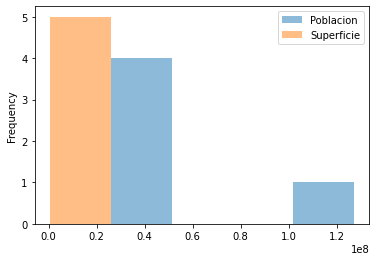

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

datos[['Poblacion','Superficie']].plot.hist(bins=5,alpha=0.5)
plt.show()

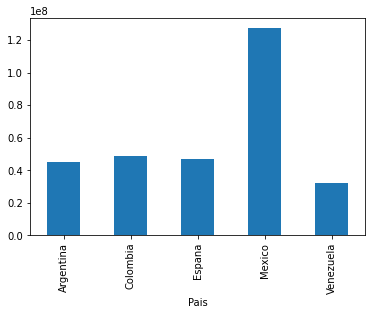

In [47]:
datos.set_index('Pais')['Poblacion'].plot(kind='bar');

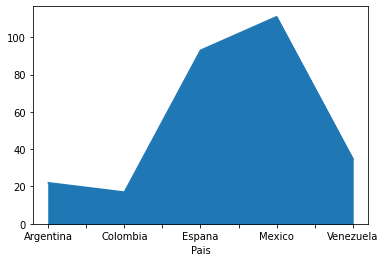

In [48]:
datos.set_index('Pais')['Habit_x_km2'].plot(kind='area');

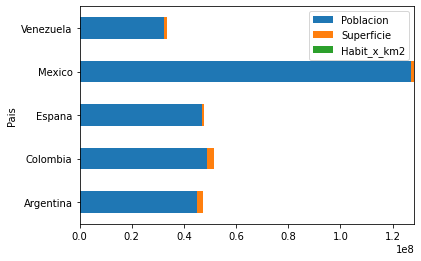

In [49]:
datos.set_index('Pais').plot.barh(stacked=True);

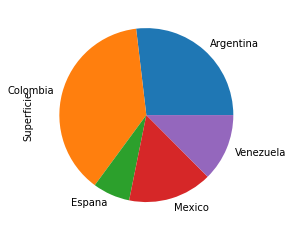

In [50]:
datos.set_index('Pais')['Superficie'].plot.pie();

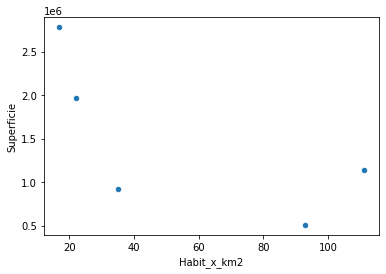

In [51]:
datos.plot.scatter(x='Habit_x_km2', y='Superficie');

## Basicos!

> ## Creditos: 
> Practica realizada del Libro: *Aprende Machine Learning*<BR>
> Autor: *Juan Ignacio Bagnato*
